# 1 Data cleaning<a id='1_Data_cleaning'></a>

## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data cleaning](#1_Data_cleaning)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
    * [1.2.1 Recap Of Data Science Problem](#1.2.1_Recap_Of_Data_Science_Problem)
    * [1.2.2 Introduction To Notebook](#1.2.2_Introduction_To_Notebook)
  * [1.3 Objectives](#1.3_Objectives)
  * [1.4 Imports](#1.4_Imports)
  * [1.5 Load Data](#1.5_Load_Data)
    * [1.5.1 Meter Readings](#1.5.1_Meter_Readings)
    * [1.5.2 Building Characteristics](#1.5.2_Building_Characteristics)
    * [1.5.3 Weather Data](#1.5.3_Weather_Data)
    * [1.5.4 Number Of Missing Values](#1.5.4_Number_Of_Missing_Values)
    
        * floor_count is missing 75% of the data

        * The year_built, and cloud_coverage are missing about 50% of the values.

        * precip_depth_1_hr is missing 36% of the values.

        * -1 values could also imply missing data
       
  * [1.6 Exploration of the Data](#1.6_Exploration_of_the_Data)
    * [1.6.1 Categorical Features](#1.6.1_Categorical_Features)
      * [1.6.1.1 Building Primary Use](#1.6.1.1_Building_Primary_Use)
      
        * The primary use of most buildings are:
          * education
          * office
          * entertainment/public assembly
          * public services 
          * lodging/residential.
    
      * [1.6.1.2 Site ID](#1.6.1.2_Site_ID)
      
        * Sites 3 and 13 have the greatest percentages of the buildings.
        
      * [1.6.1.3 Meters](#1.6.1.3_Meters)
        * all building types have mostly electricity meter readings.
        * Warehouse/Storage and Services don't have any chilled water meter readings.
        * 'Other', Parking, Warehouse/Storage, Manufacturing/industrial, Retail, Services, Utility, and Religious worship don't have any hot water meter readings
        * Retail and Religious worship don't have any steam meter readings.
    * [1.6.2 Numeric Features](#1.6.2_Numeric_Features)
      * [1.6.2.1 Numeric Data Summary](#1.6.2.1_Numeric_Data_Summary)
      * [1.6.2.2 Numeric Data Distribution](#1.6.2.2_Numeric_Data_Distribution)
    * [1.6.3 Identifying Potential Outliers](#1.6.3_Identifying_Potential_Outliers)
      * [1.6.3.1 Potential Outliers in meter_reading](#1.6.3.1_Potential_Outliers_in_meter_reading)
      * [1.6.3.2 Potential Outliers in precip_depth_1_hr](#1.6.3.2_Potential_Outliers_in_precip_depth_1_hr)

## 1.2 Introduction<a id='1.2_Introduction'></a>

### 1.2.1 Recap Of Data Science Problem<a id='1.2.1_Recap_Of_Data_Science_Problem'></a>

The goal of this project is to predict the building energy baseline and identify ways in which energy savings can be improved

### 1.2.2 Introduction To Notebook<a id='1.2.2_Introduction_To_Notebook'></a>

The datasets are the following:
* meter readings with energy use in kWh per hour for the year 2016. This dataset contains the building ID, the meter type (e.g., chilled water, electricity, steam, and hot water), and the meter reading.
* Details about each building. This includes the primary use of the building (e.g., education, office, etc.), number of floors, square footage, year it was built, and a site ID that links to weather data
* Weather data. This includes precipitation, cloud coverage, air temperature, dew temperature, sea level pressure, and wind direction and speed.

## 1.3 Objectives<a id='1.3_Objectives'></a>

* Identify null values and outliers
* Explore the distribution of the data
* Assess what data is worth keeping, replacing, or removing

## 1.4 Imports<a id='1.4_Imports'></a>

In [2]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1.5 Load Data<a id='1.5_Load_Data'></a>

In [3]:
# the supplied CSV data files are in the data/raw directory
meter_data = pd.read_csv('ashrae-energy-prediction/train.csv')
building_metadata=pd.read_csv('ashrae-energy-prediction/building_metadata.csv')
weather_data=pd.read_csv('ashrae-energy-prediction/weather_train.csv')

### 1.5.1 Meter Readings<a id='1.5.1_Meter_Readings'></a>

In [4]:
#Call the info method on energy_data to see a summary of the data
meter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [5]:
meter_data.head(5)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In this data, we have a building ID, a meter ID, a timestamp, and the recorded meter reading. 

The timestamp goes from January 1st, 2016, to December 31st, 2016

The meter ID corresponds to 0: electricity, [1: chilled water, 2: steam, 3: hot water](https://www1.eere.energy.gov/buildings/publications/pdfs/commercial_initiative/hvac_volume1_final_report.pdf)

### 1.5.2 Building Characteristics<a id='1.5.2_Building_Characteristics'></a>

In [6]:
building_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [7]:
building_metadata.head(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In this dataset, we have 1449 different buildings. 

The site ID is a foreign key for the weather data.

We have building ID with its characteristics, which are:
* Its primary use
* Its size in square feet
* The year it was built 
* The number of floors it has

Notes relevant for cleaning:
* year_built and floor_count only have 675 and 355 non-null values out of the 1449 entries
* The dtypes of year_built and floor_count are float, when they should be integer 
    * tried to change the dtype, but the NaN values gave me errors

### 1.5.3 Weather Data<a id='1.5.3_Weather_Data'></a>

In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [9]:
weather_data.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


This dataset contains the site ID, which is linked to the site ID in the building metadata, the timestamp, and the weather details for that particular site and timestamp.

The weather features are:
* Air temperature
* Cloud coverage
* Dew temperature
* Precipitation depth in 1 hour
* Sea level pressure
* Wind direction
* Wind speed
    
The features with the most null values are cloud_coverage and precip_depth_1_hr. They seem to be missing nearly half of the values

### 1.5.4 Number Of Missing Values<a id='1.5.4_Number_Of_Missing_Values'></a>

In [10]:
#In this cell, I will construct a Pandas DataFrame that shows the number and percentage of missing values by column in each dataset
meter_reading_missing=pd.concat([meter_data.isnull().sum(),100*meter_data.isnull().mean()], axis=1)
meter_reading_missing.columns=['Count','%']
meter_reading_missing=meter_reading_missing.sort_values(by='Count',ascending=False)
meter_reading_missing

,Count,%
building_id,0,0.0
meter,0,0.0
timestamp,0,0.0
meter_reading,0,0.0


In [11]:
building_metadata_missing=pd.concat([building_metadata.isnull().sum(),100*building_metadata.isnull().mean()], axis=1)
building_metadata_missing.columns=['Count','%']
building_metadata_missing=building_metadata_missing.sort_values(by='Count',ascending=False)
building_metadata_missing

,Count,%
floor_count,1094,75.500345
year_built,774,53.416149
site_id,0,0.000000
building_id,0,0.000000
primary_use,0,0.000000
square_feet,0,0.000000


In [12]:
weather_data_missing=pd.concat([weather_data.isnull().sum(),100*weather_data.isnull().mean()], axis=1)
weather_data_missing.columns=['Count','%']
weather_data_missing=weather_data_missing.sort_values(by='Count',ascending=False)
weather_data_missing

,Count,%
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496
dew_temperature,113,0.080845
air_temperature,55,0.039350
site_id,0,0.000000
timestamp,0,0.000000


* Floor_count is missing 75% of the data
* The year_built, and cloud_coverage are missing about 50% of the values

* precip_depth_1_hr is missing 36% of the values

Another thing to note is that isnull() is not the only indicator of missing data. Sometimes 'missingness' can be encoded, perhaps by a -1 or 999. I may have to look for these values as well.

### 1.5.5 Find Duplicates<a id='1.5.5_Find_Duplicates'></a>

Find duplicates in the weather data:

In [20]:
duplicate_rows = weather_data[weather_data.duplicated(weather_data.drop('site_id',axis=1).columns,keep=False)]
duplicate_rows['site_id'].unique()

array([ 0,  7,  8, 11], dtype=int64)

Now that I have found these duplicates, I need to remove them from the weather data, and in the building_metadata, for those with site_id = 11 replace with 7, and those with site_id 8 replace with 0. How does this affect my data? type of buildings change in each site, just that distribution changes.

In [24]:
#What I want to do here is replace the site_id's with the correct numbers
building_metadata.replace({'site_id':{8:0,11:7}},inplace=True)

#next, check that rows with site_ids 8 and 11 don't exist 
building_metadata[(building_metadata['site_id']==8) | (building_metadata['site_id']==11)]

,site_id,building_id,primary_use,square_feet,year_built,floor_count


In [25]:
#What I want to do here is remove sites 8 and 11 from the weather data
weather_data=weather_data[(weather_data['site_id']!=8) & (weather_data['site_id']!=11)]

#next, check that these sites don't exist anymore in weather_data
weather_data[(weather_data['site_id']==8) | (weather_data['site_id']==11)]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed


Find duplicates in the building_metadata

In [26]:
building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [42]:
building_metadata[building_metadata.duplicated(building_metadata.drop('building_id',axis=1).columns,keep=False)].sort_values(by='square_feet')

,site_id,building_id,primary_use,square_feet,year_built,floor_count
941,9,941,Lodging/residential,8079,NaN,NaN
940,9,940,Lodging/residential,8079,NaN,NaN
865,0,865,Public services,10174,NaN,1.0
866,0,866,Public services,10174,NaN,1.0
296,3,296,Public services,22000,NaN,NaN
310,3,310,Public services,22000,NaN,NaN
343,3,343,Public services,22000,NaN,NaN
67,0,67,Lodging/residential,24456,1968.0,NaN
49,0,49,Lodging/residential,24456,1968.0,NaN
100,0,100,Lodging/residential,24456,1968.0,NaN


Are these a coincidence? or real duplicates?

In [52]:
duplicate_rows=building_metadata[building_metadata.duplicated(building_metadata.drop('building_id',axis=1).columns,keep=False)]
duplicate_rows['building_id'].unique()
duplicate_rows.loc[941]==duplicate_rows.loc[940]

site_id         True
building_id    False
primary_use     True
square_feet     True
year_built     False
floor_count    False
dtype: bool

To check for this, I will select the data in meter_data for these buildings, and check if the meter readings are also duplicates.

In [34]:
meter_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [49]:
building_865_sum=sum(meter_data[meter_data['building_id']==865]['meter_reading'])
building_866_sum=sum(meter_data[meter_data['building_id']==866]['meter_reading'])

building_865_sum==building_866_sum

False

In [53]:
building_and_meter_data=building_metadata.merge(meter_data,on=['building_id'])

In [62]:
building_and_meter_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.0
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.0
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.0
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.0


In [64]:
grouping=building_and_meter_data.groupby('building_id').sum().reset_index()
grouping[grouping.duplicated(grouping.drop('building_id',axis=1).columns,keep=False)]

,building_id,site_id,square_feet,year_built,floor_count,meter,meter_reading


In [58]:
building_and_meter_data[building_and_meter_data.duplicated(building_and_meter_data.drop('building_id',axis=1).columns,keep=False)].sort_values(by='meter_reading')

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
273178,0,27,Lodging/residential,59200,1999.0,NaN,0,2016-01-01 00:00:00,0.00
853715,0,85,Lodging/residential,37241,1981.0,NaN,0,2016-02-08 09:00:00,0.00
853716,0,85,Lodging/residential,37241,1981.0,NaN,0,2016-02-08 10:00:00,0.00
853717,0,85,Lodging/residential,37241,1981.0,NaN,0,2016-02-08 11:00:00,0.00
853718,0,85,Lodging/residential,37241,1981.0,NaN,0,2016-02-08 12:00:00,0.00
...,...,...,...,...,...,...,...,...,...
965309,0,95,Lodging/residential,200933,2006.0,NaN,1,2016-08-29 09:00:00,6247.13
965953,0,95,Lodging/residential,200933,2006.0,NaN,1,2016-09-11 19:00:00,6964.71
982005,0,96,Lodging/residential,200933,2006.0,NaN,1,2016-09-11 19:00:00,6964.71
965951,0,95,Lodging/residential,200933,2006.0,NaN,1,2016-09-11 18:00:00,7682.29


## 1.6 Exploration of the Data<a id='1.6_Exploration_of_the_Data'></a>

### 1.6.1 Categorical Features<a id='1.6.1_Categorical_Features'></a>

The categorical features in this dataset are the primary use of the building, the meter type, and the site ID.

Here I will explore the distribution of the primary use of the building. In the future, I will be interested in seeing the amount of energy use for each type of building. As a reminder, there are no missing values for the primary_use column.

#### 1.6.1.1 Building Primary Use<a id='1.6.1.1_Building_Primary_Use'></a>

In [13]:
#select unique values
#building_metadata['primary_use'].value_counts()
#calculate the percentage of each type out of all buildings in this dataset
#100*building_metadata['primary_use'].value_counts()/len(building_metadata)
#Put the counts and percentages in the same df
primary_use_df=pd.concat([building_metadata['primary_use'].value_counts(),
                           100*building_metadata['primary_use'].value_counts()/len(building_metadata)],axis=1)
primary_use_df.columns=['Count','%']
primary_use_df.sort_values(by='Count',ascending=False)
primary_use_df=primary_use_df.reset_index()
primary_use_df = primary_use_df.rename(columns={'index': 'primary_use'})
primary_use_df

,primary_use,Count,%
0,Education,549,37.888199
1,Office,279,19.254658
2,Entertainment/public assembly,184,12.698413
3,Public services,156,10.766046
4,Lodging/residential,147,10.144928
5,Other,25,1.725328
6,Healthcare,23,1.587302
7,Parking,22,1.518288
8,Warehouse/storage,13,0.897170
9,Manufacturing/industrial,12,0.828157


The primary use of most buildings are education, office, entertainment/public assembly, public services, and lodging/residential.

Something that will be interesting here is to find the energy use of each type of building and what kinds of meters each type of building has, and how their energy use varies for each building type.

Text(0.5, 0, 'Count')

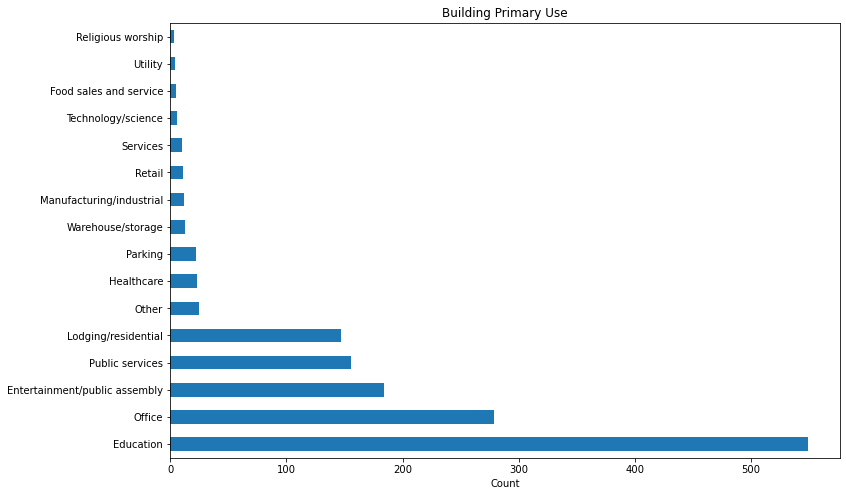

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
building_metadata['primary_use'].value_counts().plot(kind='barh', ax=ax)
ax.set_title('Building Primary Use')
ax.set_xlabel('Count')

#### 1.6.1.2 Site ID<a id='1.6.1.2_Site_ID'></a>

In [15]:
#select unique values
#building_metadata['site_id'].value_counts()
#calculate the percentage of each type out of all buildings in this dataset
#100*building_metadata['site_id'].value_counts()/len(building_metadata)
#Put the counts and percentages in the same df
site_id_df=pd.concat([building_metadata['site_id'].value_counts(),
                           100*building_metadata['site_id'].value_counts()/len(building_metadata)],axis=1)
site_id_df.columns=['Count','%']
site_id_df.sort_values(by='Count',ascending=False)
site_id_df

,Count,%
3,274,18.909593
13,154,10.628019
2,135,9.316770
9,124,8.557626
15,124,8.557626
0,105,7.246377
14,102,7.039337
4,91,6.280193
5,89,6.142167
8,70,4.830918


Sites 3 and 13 have the greatest percentages of the buildings.

What will be interesting to think about in the future are more details about the site ID. Its weather? Distribution of types of buildings? The energy use?

Text(0.5, 0, 'Count')

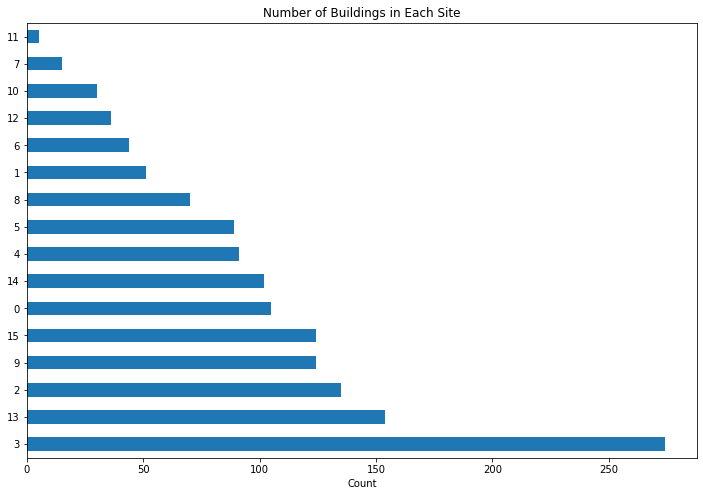

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
building_metadata['site_id'].value_counts().plot(kind='barh', ax=ax)
ax.set_title('Number of Buildings in Each Site')
ax.set_xlabel('Count')

#### 1.6.1.3 Meters<a id='1.6.1.3_Meters'></a>

How many of each meter does each type of building have? This is interesting to answer because the buildings can be different in the kind of energy that they consume

To answer this question, I have to merge the building_metadata and the meter_data

In [17]:
building_meter_data=meter_data.merge(building_metadata,on='building_id')
building_meter_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,0,0,2016-01-01 01:00:00,0.0,0,Education,7432,2008.0,NaN
2,0,0,2016-01-01 02:00:00,0.0,0,Education,7432,2008.0,NaN
3,0,0,2016-01-01 03:00:00,0.0,0,Education,7432,2008.0,NaN
4,0,0,2016-01-01 04:00:00,0.0,0,Education,7432,2008.0,NaN


In [18]:
#After merging, here I replace the 0, 1, 2, and 3 values under meter with their corresponding meter types. 
#From there, I create new columns from the strings under meter and give them 1/0 values, 
#so that I can group by building type and get the percentage of each meter type for all meter readings. 
#I also merge to this dataset to the distribution by counts and percentage of building type, 
#so I can sort the final dataset by primary_use %.
building_meter_data['meter'] = building_meter_data['meter'].map({0:'electricity', 1:'chilled_water',2:'steam',3:'hot_water'}) 
dummy_meter = pd.get_dummies(building_meter_data['meter'], prefix='meter')
building_meter_data = pd.merge(
    left=building_meter_data,
    right=dummy_meter,
    left_index=True,
    right_index=True,
)

primary_use_meters=building_meter_data.groupby('primary_use')[['meter_chilled_water','meter_electricity','meter_hot_water','meter_steam']].mean()*100
primary_use_meters=primary_use_meters.merge(primary_use_df,on='primary_use')
primary_use_meters=primary_use_meters.sort_values(by='%',ascending=False,ignore_index=True)
primary_use_meters.head()

,primary_use,meter_chilled_water,meter_electricity,meter_hot_water,meter_steam,Count,%
0,Education,22.327158,56.300946,7.453355,13.918541,549,37.888199
1,Office,25.418284,52.565972,6.591558,15.424186,279,19.254658
2,Entertainment/public assembly,16.409564,66.726286,6.145391,10.718759,184,12.698413
3,Public services,10.817548,79.385636,4.752271,5.044545,156,10.766046
4,Lodging/residential,21.330145,57.262139,4.465590,16.942126,147,10.144928


Text(0.5, 0, 'building type')

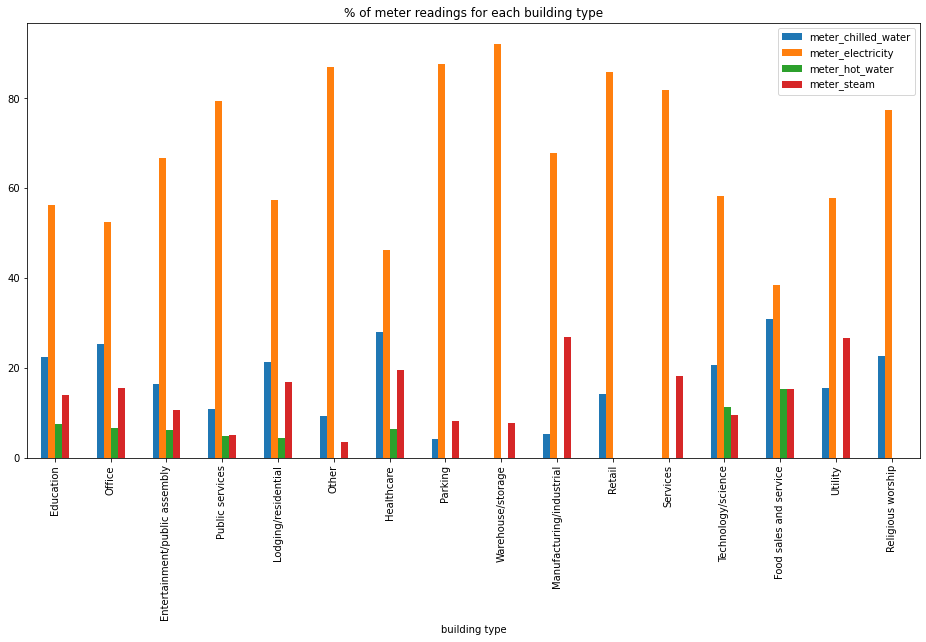

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
primary_use_meters.plot(x="primary_use", y=['meter_chilled_water','meter_electricity','meter_hot_water','meter_steam'], kind="bar", ax=ax)
ax.set_title('% of meter readings for each building type')
ax.set_xlabel('building type')

From the bargraph above we see that:
* all building types have mostly electricity meter readings. 
* Warehouse/Storage and Services don't have any chilled water meter readings. 
* 'Other', Parking, Warehouse/Storage, Manufacturing/industrial, Retail, Services, Utility, and Religious worship don't have any hot water meter readings 
* Retail and Religious worship don't have any steam meter readings. 

### 1.6.2 Numeric Features<a id='1.6.2_Numeric_Features'></a>

#### 1.6.2.1 Numeric Data Summary<a id='1.6.2.1_Numeric_Data_Summary'></a>

Before looking at the meter data, I will have to fix the electricity readings. According to the information in the kaggle competition, the unit for the electricity measurement is kBTU. So, to convert to kWh, I have to multiply by 0.2931. 

In [20]:
meter_data[meter_data['meter']==1].head()

,building_id,meter,timestamp,meter_reading
172,161,1,2016-01-01 00:00:00,0.0000
174,162,1,2016-01-01 00:00:00,0.0000
176,163,1,2016-01-01 00:00:00,4.5719
181,166,1,2016-01-01 00:00:00,209.8860
184,167,1,2016-01-01 00:00:00,0.0000


In [21]:
corrected_values=meter_data[meter_data['meter']==1]['meter_reading']*0.2931
corrected_meter_data=meter_data.copy()
corrected_meter_data.loc[corrected_meter_data['meter']==1,'meter_reading']=corrected_values
corrected_meter_data[corrected_meter_data['meter']==1]['meter_reading'].head()

172     0.000000
174     0.000000
176     1.340024
181    61.517587
184     0.000000
Name: meter_reading, dtype: float64

In [22]:
corrected_meter_data.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,20216100.0,799.278000,426.913309,0.0,393.000000,895.0,1179.00,1448.0
meter,20216100.0,0.662441,0.930992,0.0,0.000000,0.0,1.00,3.0
meter_reading,20216100.0,2024.492786,153197.248394,0.0,15.015557,64.0,204.34,21904700.0


what is interesting to get an idea of is:
 * How much data do we have for each type of meter for each building?
 * We could even go further and see if we have enough data for each type of building (e.g., education, office, etc)
     * In the case that we don't have enough data, we will have to assess if this data is worth keeping
     * I've answered some of this to some degree above
 * What are the mean, std, min, etc. for each type of meter? How much do they differ?
     
* To check whether the meter reading values make sense, I looked up from [EIA the electricity consumption totals for buildings](https://www.eia.gov/consumption/commercial/data/2012/c&e/cfm/pba4.php). According to the chart, a building consumes 14.6 kWh/sqft of electricity a year. This number corresponds to 362 kWh per hour for a 200,000 sqft building. This value, however, is much smaller than what the data contains. This is where it would be useful to consult a SME.

In [22]:
building_metadata.describe().T

,count,mean,std,min,25%,50%,75%,max
site_id,1449.0,6.952381,5.003432,0.0,3.0,5.0,13.0,15.0
building_id,1449.0,724.000000,418.434583,0.0,362.0,724.0,1086.0,1448.0
square_feet,1449.0,92111.776398,110769.950997,283.0,23012.0,57673.0,115676.0,875000.0
year_built,675.0,1967.957037,31.054030,1900.0,1949.0,1970.0,1995.0,2017.0
floor_count,355.0,3.740845,3.333683,1.0,1.0,3.0,5.0,26.0


In [23]:
weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
site_id,139773.0,7.478977,4.604744,0.0,3.0,7.0,11.0,15.0
air_temperature,139718.0,14.418106,10.626595,-28.9,7.2,15.0,22.2,47.2
cloud_coverage,70600.0,2.149306,2.599150,0.0,0.0,2.0,4.0,9.0
dew_temperature,139660.0,7.350158,9.790235,-35.0,0.6,8.3,14.4,26.1
precip_depth_1_hr,89484.0,0.983047,8.463678,-1.0,0.0,0.0,0.0,343.0
sea_level_pressure,129155.0,1016.158038,7.629684,968.2,1011.8,1016.4,1020.8,1045.5
wind_direction,133505.0,180.526632,111.523629,0.0,80.0,190.0,280.0,360.0
wind_speed,139469.0,3.560527,2.335874,0.0,2.1,3.1,5.0,19.0


Weather data was collected from a meteorological station as close as possible to the site.
* site_id
* air_temperature - Degrees Celsius
* [cloud_coverage](https://polarpedia.eu/en/okta-scale/#:~:text=1%20okta%20represents%20a%20cloud,fog%20or%20other%20meteorological%20phenomena.) - Portion of the sky covered in clouds, in oktas
* [dew_temperature](https://www.weather.gov/arx/why_dewpoint_vs_humidity) - Degrees Celsius
* [precip_depth_1_hr](https://water.usgs.gov/edu/activity-howmuchrain-metric.html) - Millimeters
* [sea_level_pressure](https://en.wikipedia.org/wiki/Atmospheric_pressure#:~:text=Average%20sea%2Dlevel%20pressure%20is,29.921%20inHg%3B%20760.00%20mmHg) - Millibar/hectopascals
* wind_direction - Compass direction (0-360)
* [wind_speed](http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed) - Meters per second

Things to keep in mind for data cleaning:

* Here we observe a precipitation depth of -1 mm. This is likely missing data.

* According to USGS, a rainfall greater than 50 mm depth is a violent shower. The max in this dataset is 343 mm. Is this plausible or too high? Could this be a rare event? It looks like this is an outlier. The mean is 0.98 and the median is 0.0

* Average sea level pressure is 1013.25 mbar. This is close to the average in this dataset.



Some of the precipitation data have a value of -1. These could be interpretted as null values. What percentage of the data have a value of -1, in addition to the null values? As a reminder, about 36% percent of the entries for this feature are null values.

In [24]:
weather_data_missing.loc['precip_depth_1_hr']['%']+100*len(weather_data[weather_data['precip_depth_1_hr']==-1])/len(weather_data)

40.114328232205075

The next step here is to replace the -1 values with null values

In [25]:
weather_data.precip_depth_1_hr.loc[weather_data['precip_depth_1_hr']==-1] = np.nan

C:\Users\Melissa\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### 1.6.2.2 Numeric Data Distribution<a id='1.6.2.2_Numeric_Data_Distribution'></a>

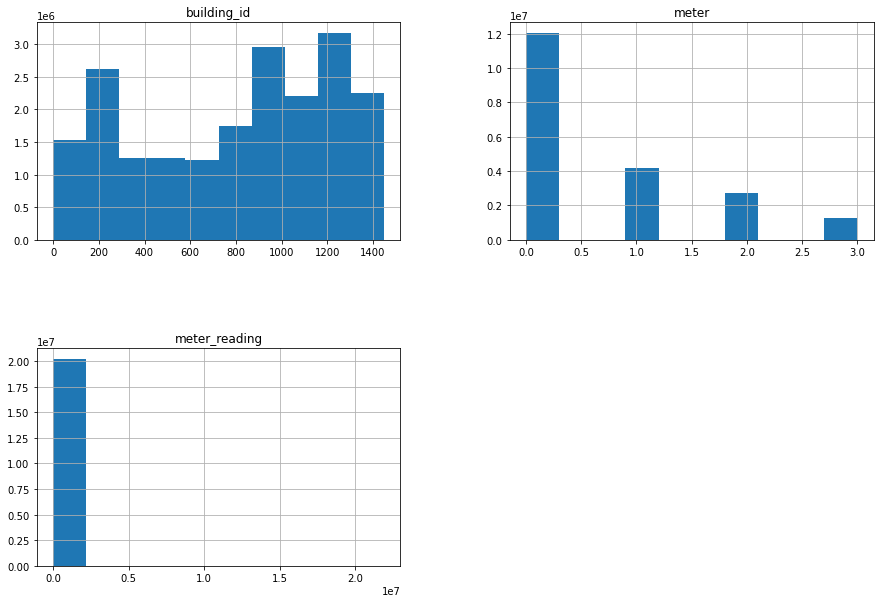

In [26]:
corrected_meter_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

* there are a lot more readings from the meter 0, which is for electricity
* Not sure how relevant this is... but there are more buildings of those with IDs 700 to 1400... maybe these are more of the education type?
* The meter_reading histogram and the description table with simple statistics clearly shows there is an outlier. The max for the meter reading is 21904700.0!!!
* I need to investigate this issue with the meter further. 
    * what is a meter reading that makes sense?
    * What buildings are recording that crazy value for the meter readings? what type of meters are these? I will investigate this further later in the notebook

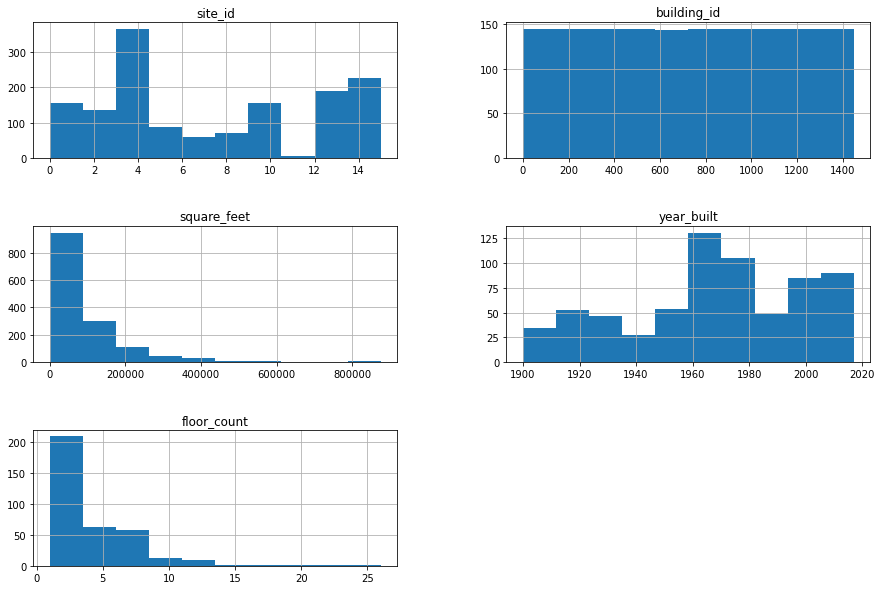

In [27]:
building_metadata.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

The building characteristics dataset looks okay to me. 

* There are some outliers with bigger buildings. It may be interesting to grab more details about these buildings. What type of buildings are these? Do they consume a lot of energy?
* Most of the buildings were built after 1960. How related is energy consumption to the year that it was built? It should be noted that we are missing half of the year_built values. 
* Also, it should be noted that we are also missing 75% of the floor_count values.
* Another thing that could be checked as I go through this project is whether floor count and square_feet correlate. If so, floor_count could be removed since it is missing a lot of the data and square_feet could be enough to capture the influence of building size on energy consumption.

<AxesSubplot:xlabel='square_feet', ylabel='floor_count'>

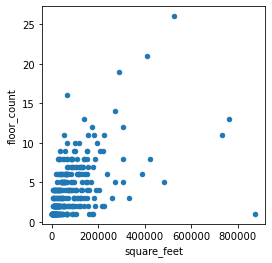

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
building_metadata.plot(x="square_feet", y='floor_count', kind="scatter", ax=ax)

They don't... 

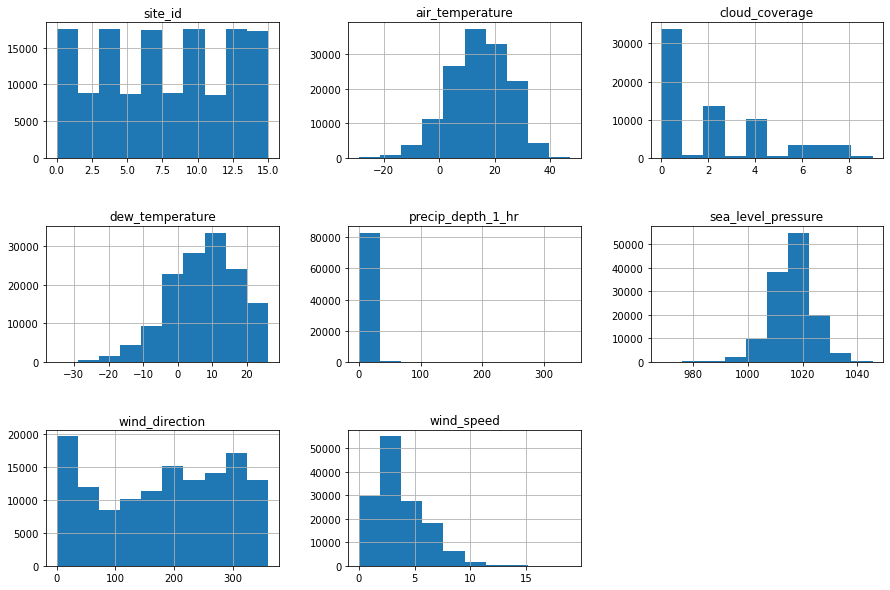

In [29]:
weather_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

#### 1.6.2.3 Assess Skewness in Numeric Data<a id='1.6.2.3_Assess_Skewness_in_Numeric_Data'></a>

One way to quantify skewness is with the use of the .skew() method in pandas. This can be done in addition to assessing skewness by viasualization. Below we see that meter_reading is highly skewed, but this can be corrected by taking the log of the data.

In [30]:
corrected_meter_data['meter_reading'].skew(axis=0,skipna=True)

104.88999974187708

In [31]:
corrected_meter_data['meter_reading_log']=np.log(corrected_meter_data['meter_reading']+1)
corrected_meter_data.head()
corrected_meter_data['meter_reading_log'].skew(axis=0,skipna=True)

-0.22088759808467853

<AxesSubplot:>

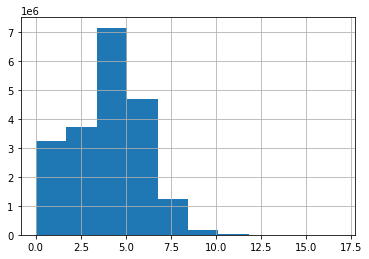

In [32]:
corrected_meter_data['meter_reading_log'].hist()

Below, we also assess the skewness of the weather data, and log transform those that are highly skewed, specifically **precip_depth_1**, **cloud_coverage**, and **wind_speed**.

In [33]:
weather_data.skew(axis = 0, skipna = True, numeric_only=True)

site_id                0.003111
air_temperature       -0.318658
cloud_coverage         0.978444
dew_temperature       -0.450697
precip_depth_1_hr     17.740564
sea_level_pressure    -0.415321
wind_direction        -0.168956
wind_speed             0.829448
dtype: float64

For the weather data, **precip_depth_1_hr** as observed is highly skewed. **cloud_coverage** and **wind_speed** are somewhat skewed. 

In [34]:
weather_data['precip_depth_1_hr_log']=np.log(weather_data['precip_depth_1_hr']+1)
weather_data['cloud_coverage_log']=np.log(weather_data['cloud_coverage']+1)
weather_data['wind_speed_log']=np.log(weather_data['wind_speed']+1)

In [35]:
weather_data.skew(axis=0,skipna=True,numeric_only=True)

site_id                   0.003111
air_temperature          -0.318658
cloud_coverage            0.978444
dew_temperature          -0.450697
precip_depth_1_hr        17.740564
sea_level_pressure       -0.415321
wind_direction           -0.168956
wind_speed                0.829448
precip_depth_1_hr_log     4.498698
cloud_coverage_log        0.309800
wind_speed_log           -0.811159
dtype: float64

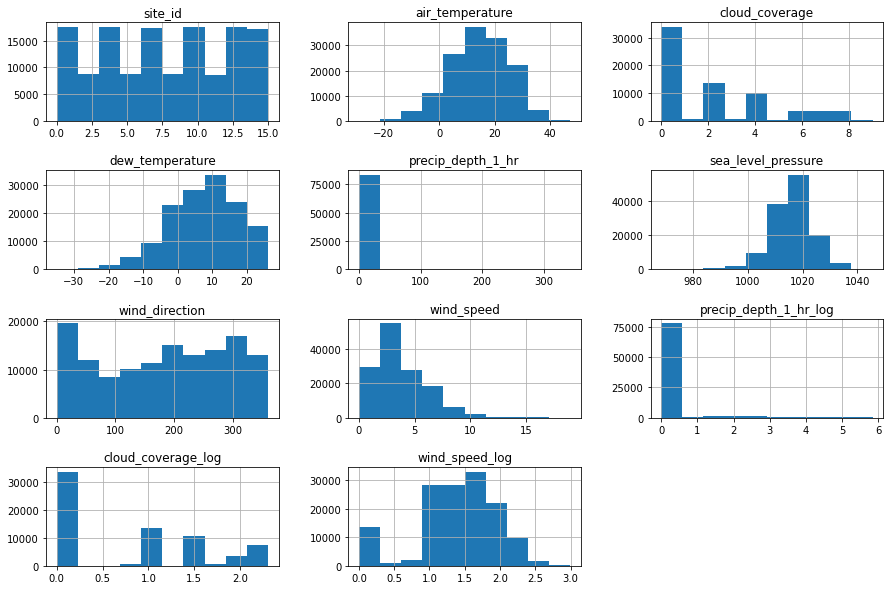

In [36]:
weather_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

**cloud_coverage** has a lot of 0.0 values. **precip_depth_1_hr_log** is still highly skewed. This needs a closer look

Next we asssess the skewness in the building characteristics data, and log transform those that are significantly skewed.

In [37]:
building_metadata.skew(axis=0,skipna=True,numeric_only=True)

site_id        0.325490
building_id    0.000000
square_feet    2.950772
year_built    -0.376338
floor_count    2.231123
dtype: float64

**square_feet** and **floor_count** are significantly skewed. Therefore, we will log transform them.

In [38]:
building_metadata['floor_count_log']=np.log(building_metadata['floor_count'])
building_metadata['square_feet_log']=np.log(building_metadata['square_feet'])
building_metadata.skew(axis=0,skipna=True,numeric_only=True)

site_id            0.325490
building_id        0.000000
square_feet        2.950772
year_built        -0.376338
floor_count        2.231123
floor_count_log    0.229718
square_feet_log   -0.685016
dtype: float64

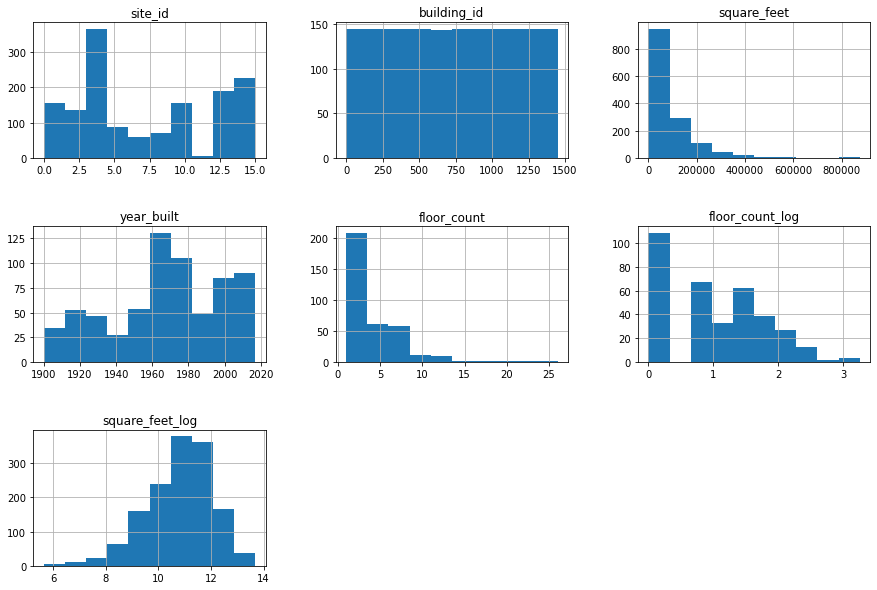

In [39]:
building_metadata.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

**floor_count** still has a lot of 0 values

### 1.6.3 Identifying Potential Outliers<a id='1.6.3_Identifying_Potential_Outliers'></a>

In section 1.6.2, I identified features that could potentially contain outliers. These features are:
   * meter_reading
   * precip_depth_1_hr
   
After log transformation, meter_reading looks okay. But still deserves a closer look because 2x10<sup>7</sup> is still very large energy consumption for an hour!

Precip_depth definitely needs a closer look. Even with the log transformation, it is sill highly skewed. When we look at the data, as a reminder, 40% are missing, and 55% are 0.0. only ~5% are greater than 0.0.
    
Other features that are skewed and worth looking at are:
   * square_feet
   * floor_count
   * cloud_coverage
   * wind_speed

After log transformation, square_feet looks okay. Floor count should be okay. While we have a lot of 0.0 values (log of 1-floor buildings), to me it makes sense that buildings tend to have 1 floor, and bigger buildings are towards the tail end of the distribution. This is also missing a lot of the data (75%). Could the skewness be due to so much data missing?

Cloud_coverage and wind_speed were skewed. The log transformation fixed wind_speed. However, cloud coverage still seems somewhat skewed, with a lot of 0.0 values. 

#### 1.6.3.1 Potential Outliers in meter_reading<a id='1.6.3.1_Potential_Outliers_in_meter_reading'></a>

My goals here are to identify the buildings with more than exp(10) energy consumption, the outliers when log transformation is applied on the meter_readings data. Then I want to check if there is a commonality in this subset of the data. 
- Is this energy consumption related to large buildings? 
- the type of building? 
- the type of meter reading? 
- specific weather conditions? (too cold or too hot)
    - are these recordings mostly from the summer/winter?

first, I want to turn the timestamp into a datetime object so I can extract the date from it and use this for analysis

In [ ]:
corrected_meter_data['timestamp']=pd.to_datetime(corrected_meter_data['timestamp'],format='%Y-%m-%d %H:%M:%S')
corrected_meter_data['month']=corrected_meter_data['timestamp'].dt.month
corrected_meter_data['day']=corrected_meter_data['timestamp'].dt.day
corrected_meter_data['dayofweek']=corrected_meter_data['timestamp'].dt.dayofweek
corrected_meter_data['hour']=corrected_meter_data['timestamp'].dt.hour
corrected_meter_data['minute']=corrected_meter_data['timestamp'].dt.minute
corrected_meter_data.head()

In [40]:
corrected_meter_data['date'] = pd.to_datetime(corrected_meter_data['timestamp'],format='%Y-%m-%d %H:%M:%S').dt.date
corrected_meter_data['date'] = pd.to_datetime(corrected_meter_data['date'],format='%Y-%m-%d')
corrected_meter_data['hour']= pd.to_datetime(corrected_meter_data['timestamp'],format='%Y-%m-%d %H:%M:%S').dt.hour
corrected_meter_data['month']= pd.to_datetime(corrected_meter_data['timestamp'],format='%Y-%m-%d %H:%M:%S').dt.month
corrected_meter_data.head()

KeyboardInterrupt: 

In [43]:
corrected_meter_data.dtypes

building_id                   int64
meter                         int64
timestamp                    object
meter_reading               float64
meter_reading_log           float64
date                 datetime64[ns]
hour                          int64
month                         int64
dtype: object

Here I am starting out by looking at the buildings reporting log(meter_readings) > 10.  There are 26 unique buildings.

In [60]:
selected_buildings=corrected_meter_data[corrected_meter_data['meter_reading_log']>10].sort_values(by='meter_reading',ascending=False)['building_id'].unique()
selected_buildings

array([1099,  778, 1021, 1168, 1197, 1088, 1159,  993, 1148,  954,   60,
       1154, 1156, 1107, 1140, 1284,  904, 1104, 1072, 1331, 1258, 1214,
        876, 1158,  776,  119], dtype=int64)

Next, I am grouping by building_id and meter to find out if there is a specific meter reporting these values.

In [46]:
corrected_meter_data[corrected_meter_data['meter_reading_log']>10].groupby(['building_id','meter','timestamp']).max().sort_values(by=['meter_reading','building_id','meter'],ascending=False)

meter_reading  meter_reading_log  \
building_id meter timestamp                                               
1099        2     2016-06-13 09:00:00     21904700.0          16.902212   
                  2016-06-10 09:00:00     21889900.0          16.901536   
                  2016-06-10 08:00:00     21874500.0          16.900832   
                  2016-11-09 14:00:00     21847900.0          16.899615   
                  2016-06-13 08:00:00     21844500.0          16.899460   
...                                              ...                ...   
1107        2     2016-01-15 19:00:00        22031.2          10.000260   
1088        2     2016-02-12 20:00:00        22031.2          10.000260   
                  2016-04-08 15:00:00        22031.2          10.000260   
                  2016-04-12 14:00:00        22031.2          10.000260   
                  2016-11-28 11:00:00        22031.2          10.000260   

                                            date  hour  month  
building_id meter timestamp                                    
1099        2     2016-06-13 09:00:00 2016-06-13     9      6  
                  2016-06-10 09:00:00 2016-06-10     9      6  
                  2016-06-10 08:00:00 2016-06-10     8      6  
                  2016-11-09 14:00:00 2016-11-09    14     11  
                  2016-06-13 08:00:00 2016-06-13     8      6  
...                                          ...   ...    ...  
1107        2     2016-01-15 19:00:00 2016-01-15    19      1  
1088        2     2016-02-12 20:00:00 2016-02-12    20      2  
                  2016-04-08 15:00:00 2016-04-08    15      4  
                  2016-04-12 14:00:00 2016-04-12    14      4  
                  2016-11-28 11:00:00 2016-11-28    11     11  

[37044 rows x 5 columns]

Is there a specific meter reporting these numbers? No, all types of meters are included. Although, when the readings are summed or when we pick the maximum meter reading, most values come from meter 2, which corresponds to hot water. This is significant, because previously, we saw that most readings are from meter 1, which is from electricity. But, electricity does not seem to be driving the highest energy consumption for this subset of the data.

In [47]:
corrected_meter_data[corrected_meter_data['meter_reading_log']>10].sort_values(by='meter_reading',ascending=False)['meter'].unique()

array([2, 1, 3, 0], dtype=int64)

do these buildings have any specific features?

Is the large energy use due to a specific building type or size? 

In terms of the type of building, not necessarily. While most are office, education, and services, and entertainment, previously we saw that most buildings fall into these categories anyways.

In [61]:
meter_reading_by_building=corrected_meter_data[corrected_meter_data['meter_reading_log']>10].groupby(['building_id']).max().reset_index()[['building_id','meter_reading']]
high_consumption_buildings=building_metadata.loc[building_metadata['building_id'].isin(selected_buildings)].merge(meter_reading_by_building,on='building_id')
high_consumption_buildings.sort_values('meter_reading',ascending=False)
high_consumption_buildings['max_meter_reading_log']=np.log(high_consumption_buildings['meter_reading'])
high_consumption_buildings.sort_values('square_feet',ascending=False)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,floor_count_log,square_feet_log,meter_reading,max_meter_reading_log
15,13,1148,Office,861524,NaN,NaN,NaN,13.666458,8.074220e+04,11.299017
19,13,1159,Office,671507,NaN,NaN,NaN,13.417280,1.006200e+05,11.519106
20,13,1168,Office,577101,NaN,NaN,NaN,13.265773,1.316250e+05,11.787712
24,14,1284,Education,442438,NaN,NaN,NaN,13.000056,3.179900e+04,10.367190
7,9,993,Education,428647,NaN,NaN,NaN,12.968389,8.791945e+04,11.384176
11,13,1099,Education,332884,NaN,NaN,NaN,12.715549,2.190470e+07,16.902212
6,9,954,Education,305224,NaN,NaN,NaN,12.628801,8.060074e+04,11.297263
9,13,1072,Healthcare,305000,NaN,NaN,NaN,12.628067,2.818950e+04,10.246705
18,13,1158,Public services,294812,NaN,NaN,NaN,12.594093,2.423750e+04,10.095656
10,13,1088,Education,287594,NaN,NaN,NaN,12.569305,1.045312e+05,11.557241


building 1099 looks like a very extreme outlier... it is the only log transformed meter reading that is higher than 16. The rest are all below 12.

In terms of the size of the building, I am looking at a correlation between the max of energy consumption reported by the meter readings and the size of the building, and there is no strong correlation. I am excluding building 1099 because its very high value didn't allow for clearly plotting the data.

<AxesSubplot:xlabel='square_feet', ylabel='meter_reading'>

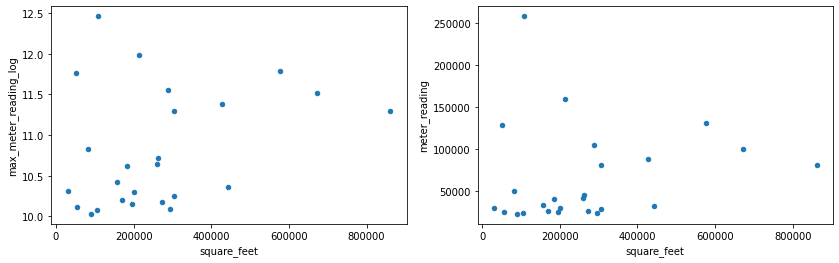

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(14,4))
high_consumption_buildings[high_consumption_buildings['building_id'] != 1099].plot(x="square_feet", y='max_meter_reading_log', kind="scatter", ax=ax[0])
high_consumption_buildings[high_consumption_buildings['building_id'] != 1099].plot(x="square_feet", y='meter_reading', kind="scatter", ax=ax[1])

Next, I am interested in looking at the extremes. First, the building '1088', which is an education-type building, reports just above more than exp(10) of the energy consumption. What I am wondering is, is this some sort of spike in the meter readings, or is it more continous? It does seem to be continous. On November 28th, between the hours 6 am and 5 pm, the building used ~ 20,000 kWh per hour of energy in hot water. Maybe it was very cold on this day. 

In [75]:
building_1088=corrected_meter_data[(corrected_meter_data['building_id']==1088)]# & (corrected_meter_data['date'].dt.strftime('%Y-%m-%d')=='2016-11-28')]
building_1099=corrected_meter_data[(corrected_meter_data['building_id']==1099)]

<AxesSubplot:xlabel='timestamp'>

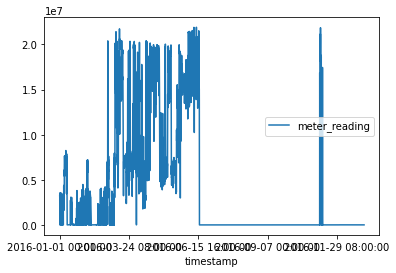

In [82]:
building_1099[building_1099['meter']==2].plot( 'timestamp' , 'meter_reading' )

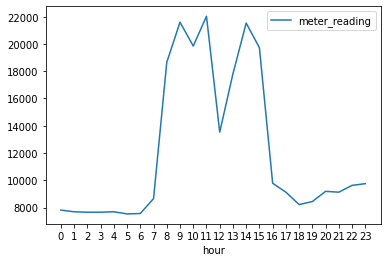

In [418]:
building_1088[building_1088['meter']==2].plot( 'hour' , 'meter_reading' )
#plt.xticks(rotation=70);
plt.xticks(np.arange(0, 24, 1.0));

Here we are checking the weather. It was quite chilly. ~ 44 degrees fahrenheit in the morning, then ~ 50 in the evening. It was windier than average.

In [421]:
weather_data[(weather_data['site_id']==13) & ((weather_data['timestamp']>='2016-11-28 06:00:00') & (weather_data['timestamp']<='2016-11-28 17:00:00'))]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,precip_depth_1_hr_log,cloud_coverage_log,wind_speed_log
121733,13,2016-11-28 06:00:00,7.2,8.0,5.6,3.0,990.5,130.0,9.3,1.386294,2.197225,2.332144
121734,13,2016-11-28 07:00:00,7.2,NaN,5.6,NaN,989.1,130.0,10.3,NaN,NaN,2.424803
121735,13,2016-11-28 08:00:00,7.8,NaN,6.1,0.0,988.2,130.0,7.2,0.000000,NaN,2.104134
121736,13,2016-11-28 09:00:00,8.3,NaN,6.7,0.0,987.0,140.0,9.8,0.000000,NaN,2.379546
121737,13,2016-11-28 10:00:00,9.4,NaN,7.8,8.0,986.1,150.0,8.2,2.197225,NaN,2.219203
121738,13,2016-11-28 11:00:00,10.0,NaN,7.8,5.0,985.5,160.0,8.2,1.791759,NaN,2.219203
121739,13,2016-11-28 12:00:00,10.6,8.0,7.8,NaN,985.0,160.0,9.8,NaN,2.197225,2.379546
121740,13,2016-11-28 13:00:00,10.6,NaN,7.2,0.0,984.9,160.0,7.2,0.000000,NaN,2.104134
121741,13,2016-11-28 14:00:00,11.1,NaN,7.2,0.0,984.7,170.0,7.2,0.000000,NaN,2.104134
121742,13,2016-11-28 15:00:00,11.1,NaN,7.8,0.0,984.6,160.0,8.2,0.000000,NaN,2.219203


Select building 1099 and look at its energy consumption with meter 2, which corresponds to hot water

In [423]:
building_1099=corrected_meter_data[(corrected_meter_data['building_id']==1099) & (corrected_meter_data['date'].dt.strftime('%Y-%m-%d')=='2016-05-13')]

In [426]:
building_1099.head()

C:\Users\baro284\AppData\Local\Temp\ipykernel_27844\3188547691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building_1099['hour']=building_1099['time'].dt.hour


,building_id,meter,timestamp,meter_reading,meter_reading_log,time,date,hour
7142211,1099,0,2016-05-13 00:00:00,4.475930e+02,6.106116,2016-05-13 00:00:00,2016-05-13,0
7142212,1099,2,2016-05-13 00:00:00,1.820260e+07,16.717075,2016-05-13 00:00:00,2016-05-13,0
7144558,1099,0,2016-05-13 01:00:00,4.341390e+02,6.075666,2016-05-13 01:00:00,2016-05-13,1
7144559,1099,2,2016-05-13 01:00:00,1.869770e+07,16.743911,2016-05-13 01:00:00,2016-05-13,1
7146904,1099,0,2016-05-13 02:00:00,3.643430e+02,5.900837,2016-05-13 02:00:00,2016-05-13,2


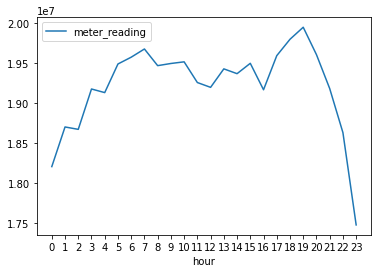

In [427]:
building_1099[building_1099['meter']==2].plot( 'hour' , 'meter_reading' )
plt.xticks(np.arange(0, 24, 1.0));

This is continuous as well. It is using hot water almost every hour of the day...

When we check the weather we see that it is also quite chilly. We could also ask ourselves, do all chilly days correspond to high hot water usage?

**check standard deviations

In [428]:
weather_data[(weather_data['site_id']==13) & ((weather_data['timestamp']>='2016-05-13 00:00:00') & (weather_data['timestamp']<='2016-05-13 23:00:00'))]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,precip_depth_1_hr_log,cloud_coverage_log,wind_speed_log
116951,13,2016-05-13 00:00:00,12.8,8.0,5.6,0.0,1016.6,280.0,7.2,0.000000,2.197225,2.104134
116952,13,2016-05-13 01:00:00,12.8,NaN,5.6,0.0,1016.5,290.0,6.2,0.000000,NaN,1.974081
116953,13,2016-05-13 02:00:00,12.2,NaN,5.6,0.0,1016.6,280.0,4.6,0.000000,NaN,1.722767
116954,13,2016-05-13 03:00:00,11.7,NaN,5.0,0.0,1016.9,290.0,4.6,0.000000,NaN,1.722767
116955,13,2016-05-13 04:00:00,11.1,4.0,5.0,0.0,1016.9,280.0,5.1,0.000000,1.609438,1.808289
116956,13,2016-05-13 05:00:00,10.0,NaN,5.0,0.0,1016.8,270.0,3.6,0.000000,NaN,1.526056
116957,13,2016-05-13 06:00:00,10.0,2.0,4.4,0.0,1016.7,280.0,5.1,0.000000,1.098612,1.808289
116958,13,2016-05-13 07:00:00,8.9,2.0,3.9,0.0,1016.6,300.0,4.6,0.000000,1.098612,1.722767
116959,13,2016-05-13 08:00:00,7.8,0.0,3.9,0.0,1016.2,290.0,3.1,0.000000,0.000000,1.410987
116960,13,2016-05-13 09:00:00,7.8,0.0,3.3,0.0,1016.1,270.0,3.1,0.000000,0.000000,1.410987


In [70]:
building_1099_june=corrected_meter_data[(corrected_meter_data['meter_reading']>1e4) & (corrected_meter_data['building_id']==1099) & ((corrected_meter_data['timestamp']>='2016-06-13 00:00:00') & (corrected_meter_data['timestamp']<='2016-06-14 00:00:00'))].sort_values(by='timestamp')

In [73]:
building_1099_january=corrected_meter_data[(corrected_meter_data['meter_reading']>1e4) & (corrected_meter_data['building_id']==1099) & ((corrected_meter_data['timestamp']>='2016-01-01 00:00:00') & (corrected_meter_data['timestamp']<='2016-01-02 00:00:00'))].sort_values(by='timestamp')

In [71]:
building_metadata.loc[building_metadata['building_id']==1099]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1099,13,1099,Education,332884,NaN,NaN


building 1099 is in site 13, its primary use is education, and it is a somewhat large building.

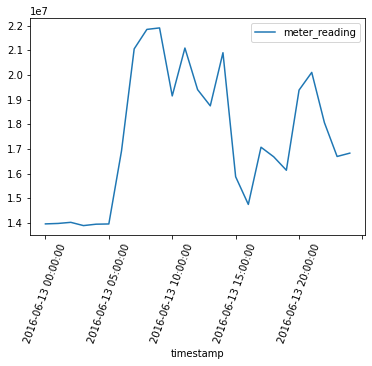

In [72]:
building_1099_june.plot( 'timestamp' , 'meter_reading' )
plt.xticks(rotation=70);

Its energy consumption is high during the day, which makes sense for an education building

it is warm in June. Why is hot water consumption so high...

It is likely not best to remove this data. While the meter readings are very, very high, and I am not sure why, they are continuous, they are not specific to a particular building, type of building, or meter type. 

Besides looking at the data manually.. are there any other ways of looking for outliers? This is a lot of data. How could I go through the data quickly to identify outliers? Here I have only looked at the meter reading throughout the day. Will I find any outliers if I do a greater range? if I look at the entire year for each building, for each meter? Maybe the modelling will tell?

In [38]:
corrected_meter_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


#### 1.6.3.2 Potential Outliers in precip_depth_1_hr<a id='1.6.3.2_Potential_Outliers_in_precip_depth_1_hr'></a>

<AxesSubplot:>

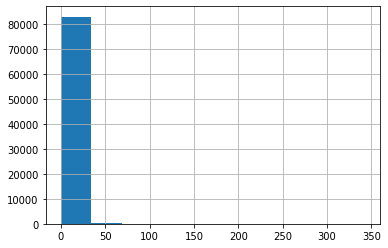

In [83]:
weather_data['precip_depth_1_hr'].hist()

40% of the precip_depth_1_hr are missing. 

what percentage have a value of 0.0, which would correspond to no precipitation?

In [84]:
100*len(weather_data[weather_data['precip_depth_1_hr']==0.0])/len(weather_data)

55.74037904316284

In addition to 40% of the data missing, 55.7 % have a value of 0.0

In [85]:
100*len(weather_data[weather_data['precip_depth_1_hr']>0.0])/len(weather_data)

4.145292724632082

4% of the data have a precipitation greater than 0.0.

according to USGS (U.S. Geological Service): "Violent shower: Greater than 50 mm per hour.""

In [132]:
extreme_precip=weather_data[weather_data['precip_depth_1_hr']>=50]

How much did it rain in each site_id?

In [86]:
weather_data.groupby('site_id')['precip_depth_1_hr'].sum().sort_values()

site_id
1         0.0
5         0.0
12        0.0
2      1499.0
4      2271.0
10     4453.0
3      6690.0
14     6976.0
9      7006.0
15     7154.0
6      7469.0
7      8297.0
11     8297.0
13     8497.0
0     12569.0
8     12569.0
Name: precip_depth_1_hr, dtype: float64

In [91]:
weather_data.groupby('site_id')['dew_temperature'].sum().sort_values()

site_id
10       720.3
7      16373.7
11     16373.7
13     29874.0
15     34991.1
2      35738.4
14     50682.8
12     57082.3
6      64217.1
1      66998.4
3      71299.4
5      71728.0
4      86885.8
9     128202.5
0     147677.8
8     147677.8
Name: dew_temperature, dtype: float64

It rained the most in site_id's 0 and 8. It did not rain at all in site_id's 1, 5, and 12. - this was wrong. These were null values!

It will be interesting to look at where and when these violent showers occurred. These can be sorted by month...

In [142]:
extreme_precip.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
353,0,2016-01-15 17:00:00,17.8,NaN,16.7,165.0,1008.5,240.0,5.1
671,0,2016-01-28 23:00:00,17.8,NaN,16.7,112.0,1007.7,320.0,5.1
2016,0,2016-03-25 00:00:00,21.1,8.0,20.0,122.0,1015.8,0.0,0.0
2017,0,2016-03-25 01:00:00,18.9,NaN,17.8,343.0,1015.7,50.0,1.5
2019,0,2016-03-25 03:00:00,20.0,NaN,18.9,130.0,1016.5,170.0,4.1


In [159]:
extreme_precip['timestamp']=pd.to_datetime(extreme_precip['timestamp'])
extreme_precip['Month'] = pd.DatetimeIndex(extreme_precip['timestamp']).month
#extreme_precip['month'] = extreme_precip['timestamp'].dt.strftime("%Y-%m-%d %H:%M:%S").month

C:\Users\baro284\AppData\Local\Temp\ipykernel_20372\3185664040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_precip['timestamp']=pd.to_datetime(extreme_precip['timestamp'])
C:\Users\baro284\AppData\Local\Temp\ipykernel_20372\3185664040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_precip['Month'] = pd.DatetimeIndex(extreme_precip['timestamp']).month


In [160]:
extreme_precip.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,month,Month
353,0,2016-01-15 17:00:00,17.8,NaN,16.7,165.0,1008.5,240.0,5.1,2016-01-15 17:00:00,1
671,0,2016-01-28 23:00:00,17.8,NaN,16.7,112.0,1007.7,320.0,5.1,2016-01-28 23:00:00,1
2016,0,2016-03-25 00:00:00,21.1,8.0,20.0,122.0,1015.8,0.0,0.0,2016-03-25 00:00:00,3
2017,0,2016-03-25 01:00:00,18.9,NaN,17.8,343.0,1015.7,50.0,1.5,2016-03-25 01:00:00,3
2019,0,2016-03-25 03:00:00,20.0,NaN,18.9,130.0,1016.5,170.0,4.1,2016-03-25 03:00:00,3


<Figure size 432x288 with 0 Axes>

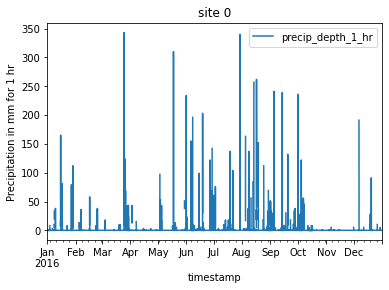

<Figure size 432x288 with 0 Axes>

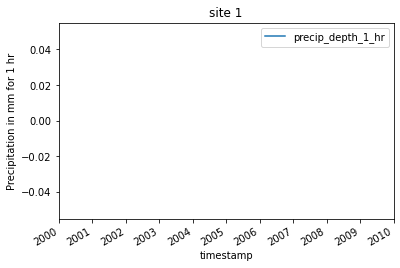

<Figure size 432x288 with 0 Axes>

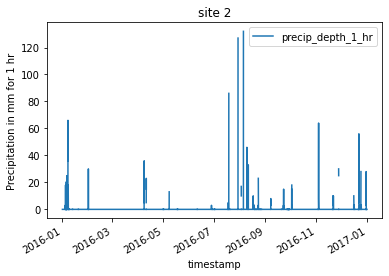

<Figure size 432x288 with 0 Axes>

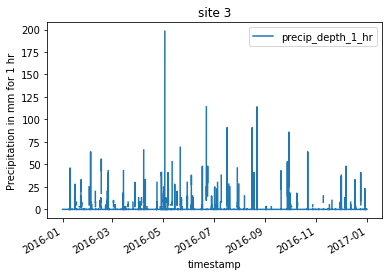

<Figure size 432x288 with 0 Axes>

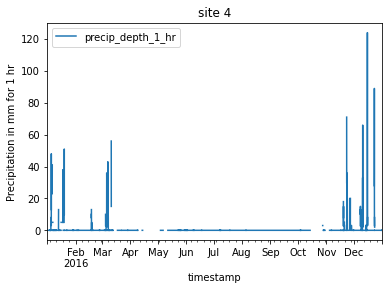

<Figure size 432x288 with 0 Axes>

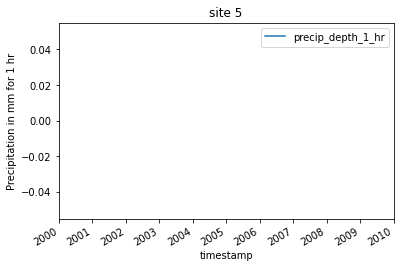

<Figure size 432x288 with 0 Axes>

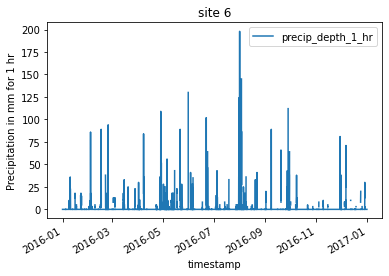

<Figure size 432x288 with 0 Axes>

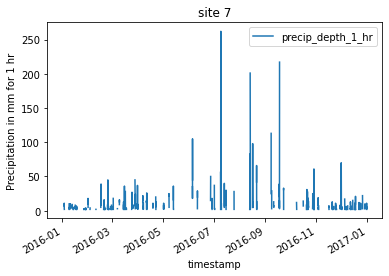

<Figure size 432x288 with 0 Axes>

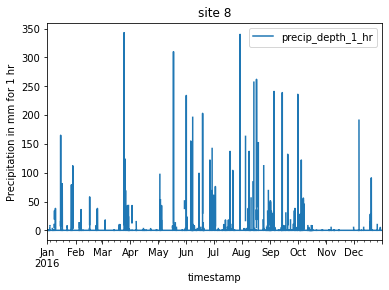

<Figure size 432x288 with 0 Axes>

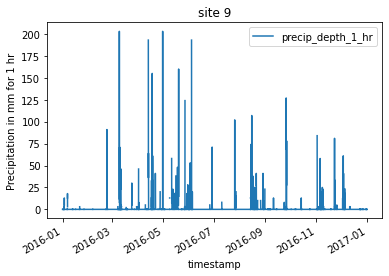

<Figure size 432x288 with 0 Axes>

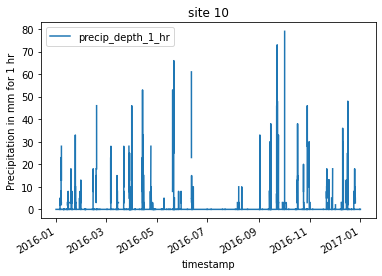

<Figure size 432x288 with 0 Axes>

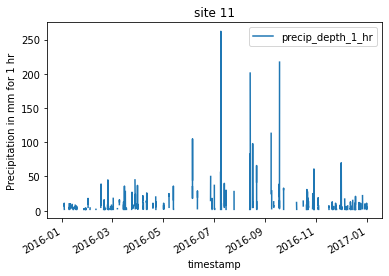

<Figure size 432x288 with 0 Axes>

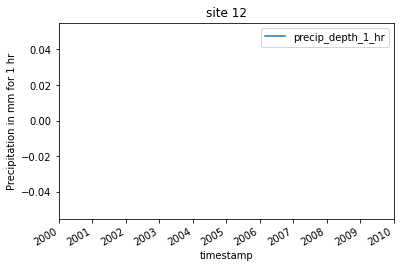

<Figure size 432x288 with 0 Axes>

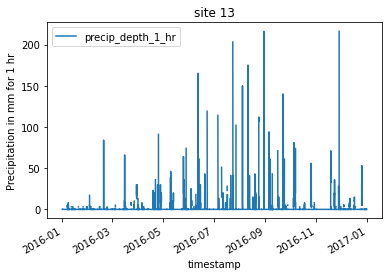

<Figure size 432x288 with 0 Axes>

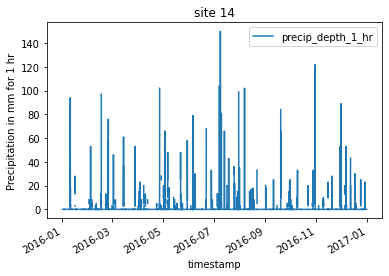

<Figure size 432x288 with 0 Axes>

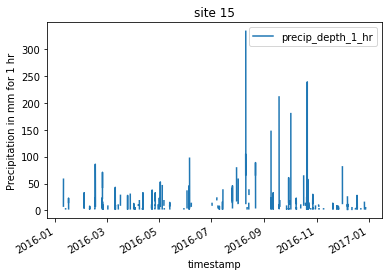

In [135]:
weather_data["timestamp"] = pd.to_datetime(weather_data["timestamp"])
site_ids=list(weather_data['site_id'].unique())
for site in site_ids:
    plt.figure()
    weather_data[weather_data['site_id']==site].plot('timestamp','precip_depth_1_hr')
    plt.title('site %s' %(site))
    plt.ylabel('Precipitation in mm for 1 hr')
    plt.show()

When I look at the data, this way, a lot of the sites have moments when precipitation is greater than 200. So these large values seem to be common. Over time, one can realize that precipitation lasts in short bursts of time. Here it is also clear that sites 1, 5, and 12 have no precip values. not even 0! So my previous analysis was misleading. When I thought they had 0 precip, it was actually null values! - so how would this affect the modeling?

<Figure size 432x288 with 0 Axes>

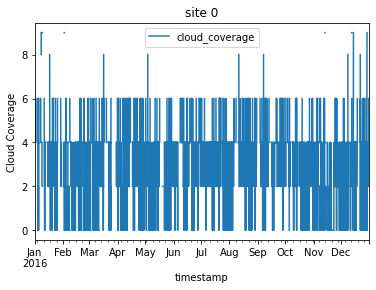

<Figure size 432x288 with 0 Axes>

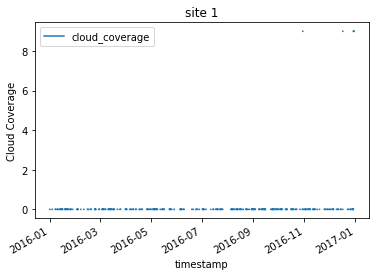

<Figure size 432x288 with 0 Axes>

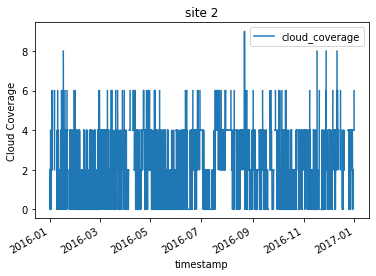

<Figure size 432x288 with 0 Axes>

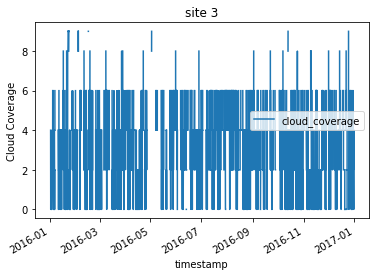

<Figure size 432x288 with 0 Axes>

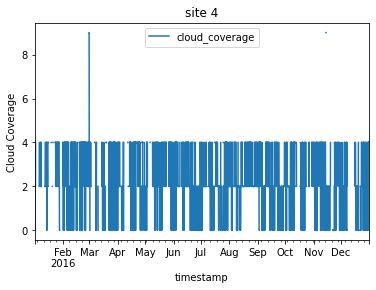

<Figure size 432x288 with 0 Axes>

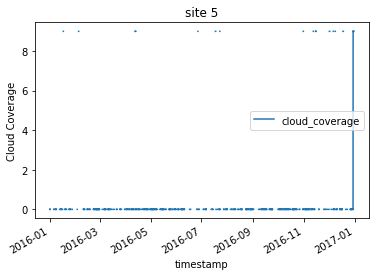

<Figure size 432x288 with 0 Axes>

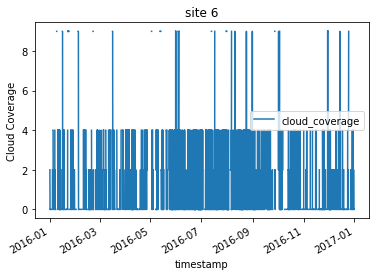

<Figure size 432x288 with 0 Axes>

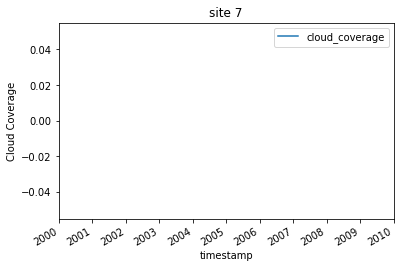

<Figure size 432x288 with 0 Axes>

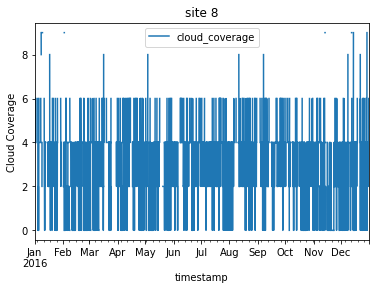

<Figure size 432x288 with 0 Axes>

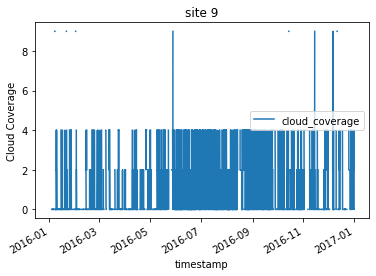

<Figure size 432x288 with 0 Axes>

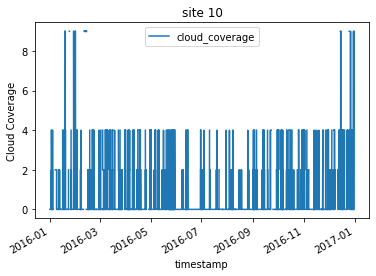

<Figure size 432x288 with 0 Axes>

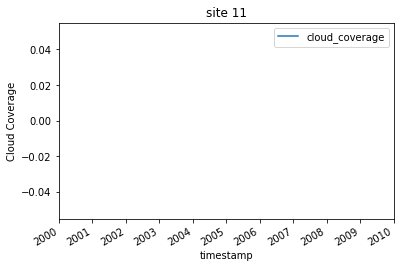

<Figure size 432x288 with 0 Axes>

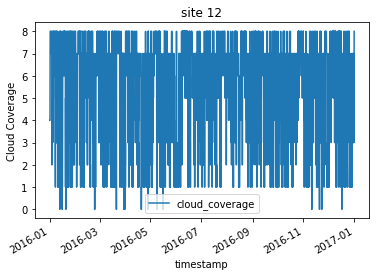

<Figure size 432x288 with 0 Axes>

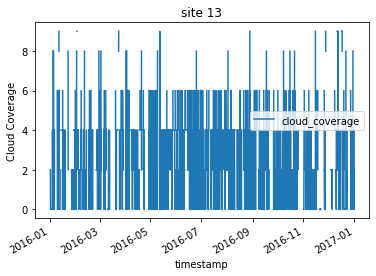

<Figure size 432x288 with 0 Axes>

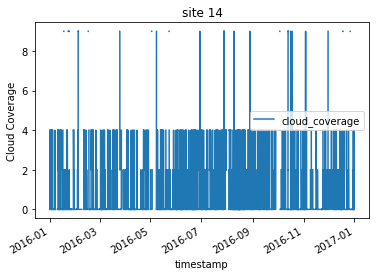

<Figure size 432x288 with 0 Axes>

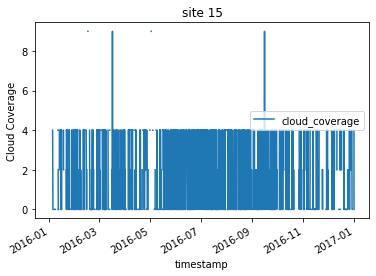

In [137]:
site_ids=list(weather_data['site_id'].unique())
for site in site_ids:
    plt.figure()
    weather_data[weather_data['site_id']==site].plot('timestamp','cloud_coverage')
    plt.title('site %s' %(site))
    plt.ylabel('Cloud Coverage')
    plt.show()

Does cloud_coverage have some outliers? They seem to appear in a lot of the sites. Or maybe they're not really outliers... clouds do tend to be quite instantaneous when they cast a shadow...
Some of them have no cloud coverage. specifically site 1 (although some outliers?), and 4, 7 and 11 (have no data!) Similar to how some of the precip data is missing. As a reminder, 1, 5, and 12 have no precip data.

In [133]:
weather_data[weather_data['site_id']==1].head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,cloud_coverage_log,wind_speed_log,precip_depth_1_hr_log
8784,1,2016-01-01 00:00:00,3.8,NaN,2.4,NaN,1020.9,240.0,3.1,NaN,1.410987,NaN
8785,1,2016-01-01 01:00:00,3.7,0.0,2.4,NaN,1021.6,230.0,2.6,0.0,1.280934,NaN
8786,1,2016-01-01 02:00:00,2.6,0.0,1.9,NaN,1021.9,0.0,0.0,0.0,0.000000,NaN
8787,1,2016-01-01 03:00:00,2.0,0.0,1.2,NaN,1022.3,170.0,1.5,0.0,0.916291,NaN
8788,1,2016-01-01 04:00:00,2.3,0.0,1.8,NaN,1022.7,110.0,1.5,0.0,0.916291,NaN


The next steps are to figure out what to do with precip and outliers of meter readings. remove? replace with mean? median? How do I assess this? I forget

For the greatly skewed data, replace with categorical values?

need to think about cloud_coverage and floor_count, which are missing 50% and 75% of the data, respectively.

In [ ]:
#correlations between the numeric data
#merge everything

#dummy - baseline, the mean
#linear 
#random forest model

<AxesSubplot:xlabel='square_feet', ylabel='year_built'>

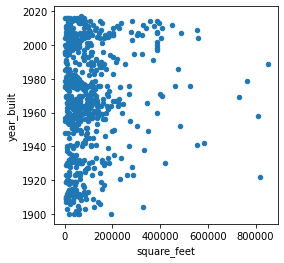

In [430]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
building_metadata.plot(x="square_feet", y='year_built', kind="scatter", ax=ax)

<AxesSubplot:xlabel='floor_count', ylabel='year_built'>

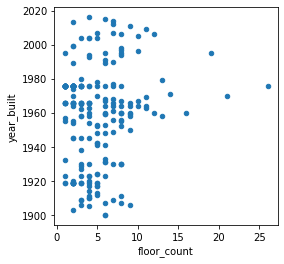

In [431]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
building_metadata.plot(x="floor_count", y='year_built', kind="scatter", ax=ax)

<AxesSubplot:xlabel='square_feet', ylabel='floor_count_log'>

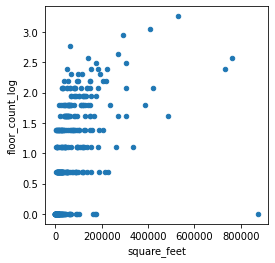

In [432]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
building_metadata.plot(x="square_feet", y='floor_count_log', kind="scatter", ax=ax)

<AxesSubplot:xlabel='square_feet_log', ylabel='floor_count'>

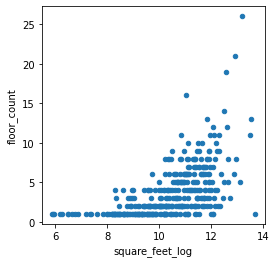

In [433]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
building_metadata.plot(x="square_feet_log", y='floor_count', kind="scatter", ax=ax)

In [434]:
weather_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,precip_depth_1_hr_log,cloud_coverage_log,wind_speed_log
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.945910,0.000000
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,NaN,1020.2,70.0,1.5,NaN,NaN,0.916291
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,0.0,1.098612,0.000000
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,0.0,1.098612,0.000000
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,NaN,1020.0,250.0,2.6,NaN,1.098612,1.280934


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
building_metadata.plot(x="square_feet_log", y='floor_count', kind="scatter", ax=ax)

45
[['air_temperature', 'cloud_coverage'], ['air_temperature', 'dew_temperature'], ['air_temperature', 'precip_depth_1_hr'], ['air_temperature', 'sea_level_pressure'], ['air_temperature', 'wind_direction'], ['air_temperature', 'wind_speed'], ['air_temperature', 'precip_depth_1_hr_log'], ['air_temperature', 'cloud_coverage_log'], ['air_temperature', 'wind_speed_log'], ['cloud_coverage', 'dew_temperature'], ['cloud_coverage', 'precip_depth_1_hr'], ['cloud_coverage', 'sea_level_pressure'], ['cloud_coverage', 'wind_direction'], ['cloud_coverage', 'wind_speed'], ['cloud_coverage', 'precip_depth_1_hr_log'], ['cloud_coverage', 'cloud_coverage_log'], ['cloud_coverage', 'wind_speed_log'], ['dew_temperature', 'precip_depth_1_hr'], ['dew_temperature', 'sea_level_pressure'], ['dew_temperature', 'wind_direction'], ['dew_temperature', 'wind_speed'], ['dew_temperature', 'precip_depth_1_hr_log'], ['cloud_coverage_log', 'dew_temperature'], ['dew_temperature', 'wind_speed_log'], ['precip_depth_1_hr', 's

C:\Users\baro284\AppData\Local\Temp\ipykernel_27844\3299393151.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(4,4))


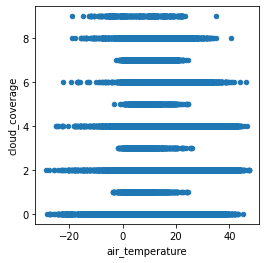

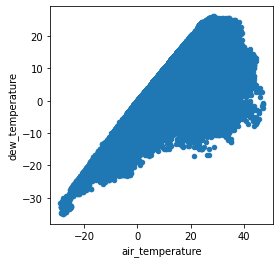

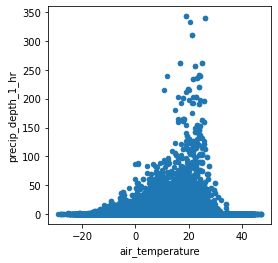

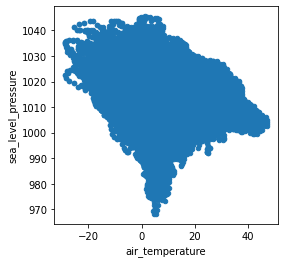

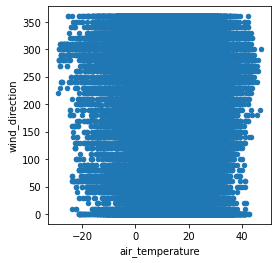

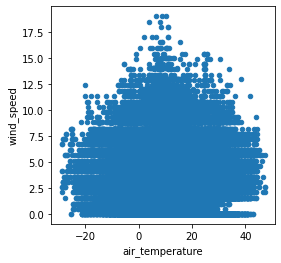

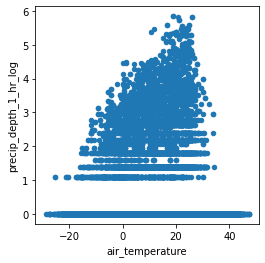

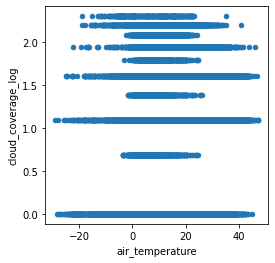

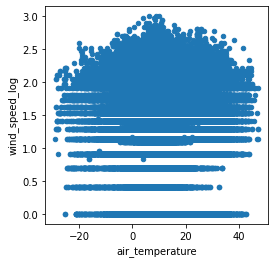

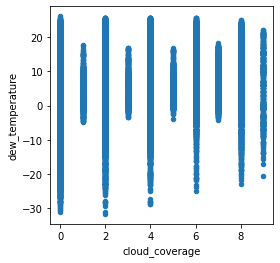

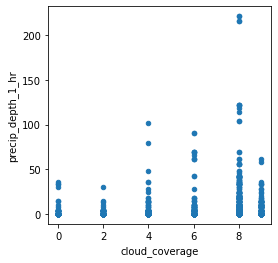

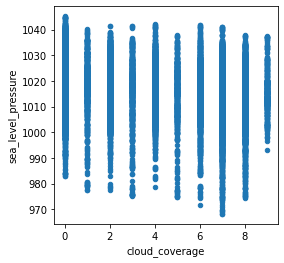

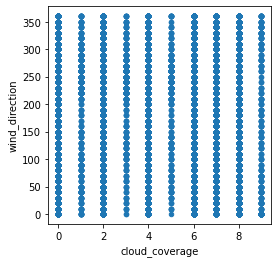

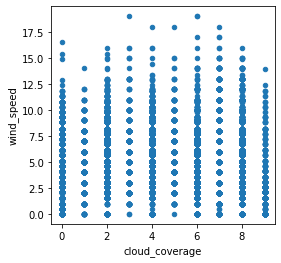

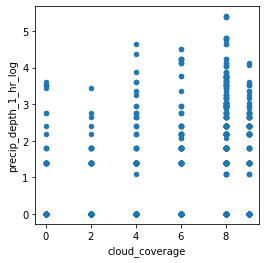

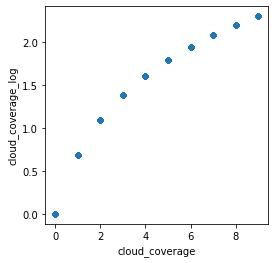

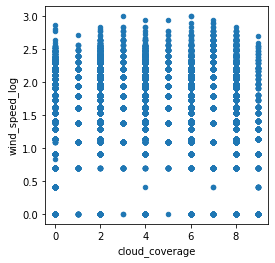

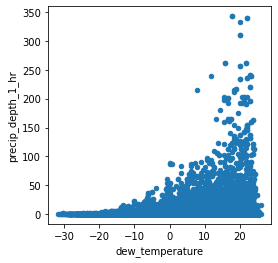

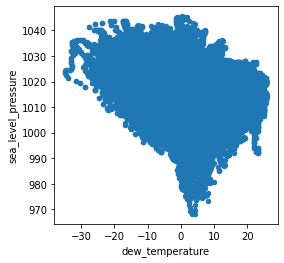

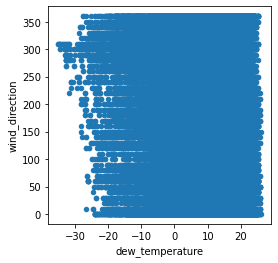

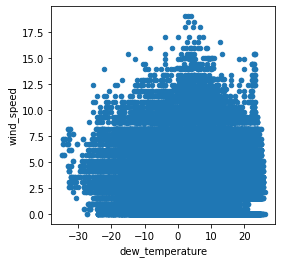

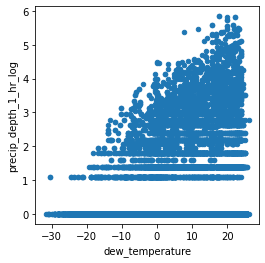

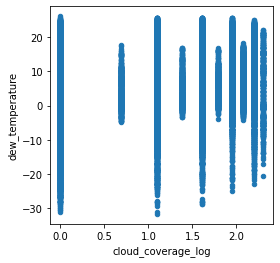

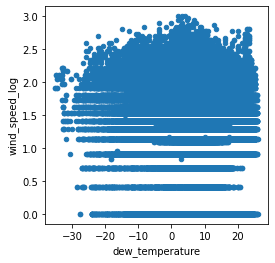

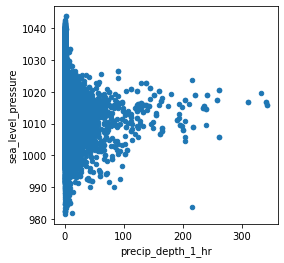

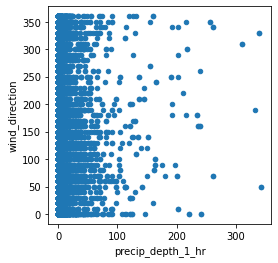

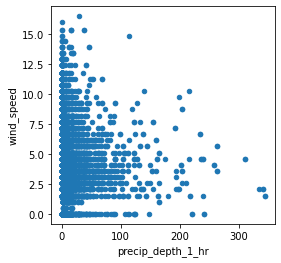

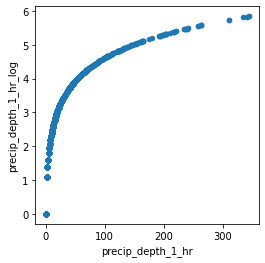

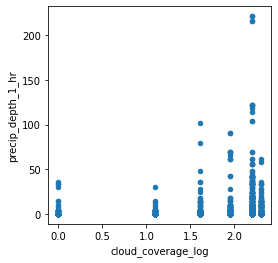

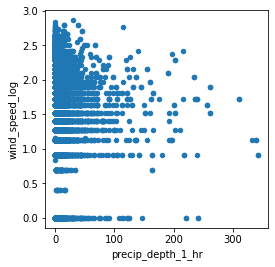

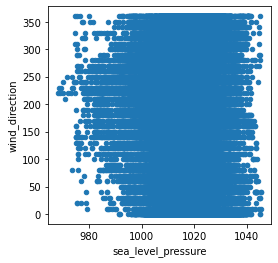

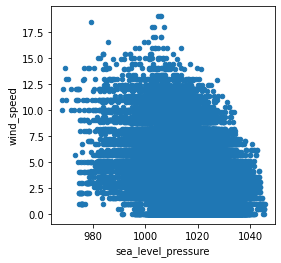

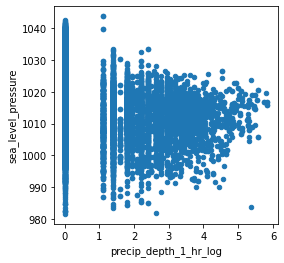

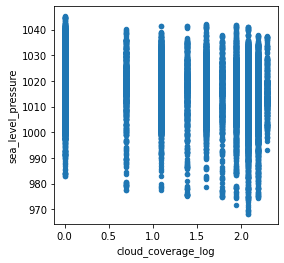

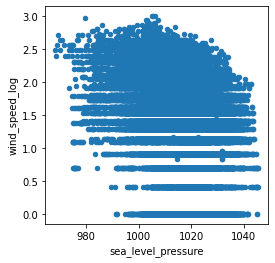

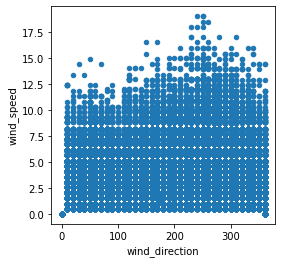

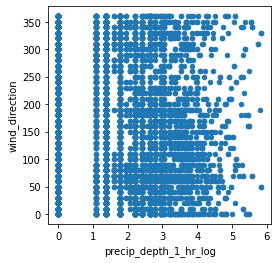

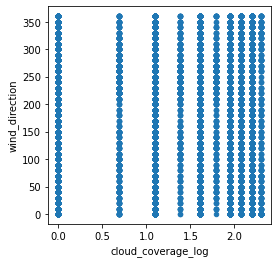

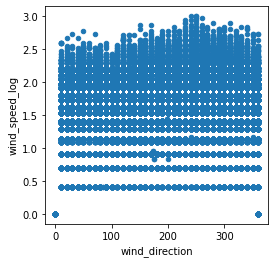

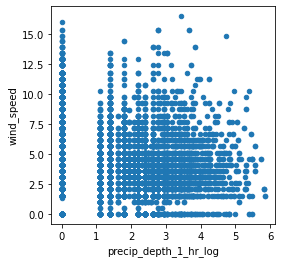

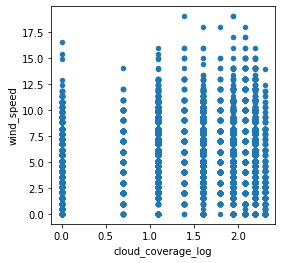

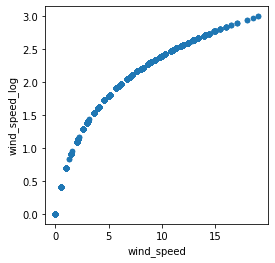

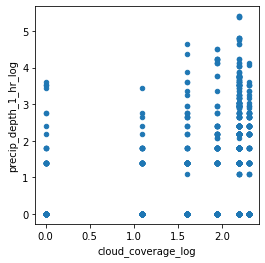

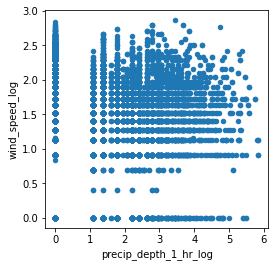

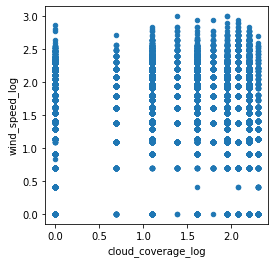

In [449]:
pairs=[]
for item1 in weather_data.columns[2:]:
    for item2 in weather_data.columns[2:]: 
        if item1 != item2:
            pair=[item1,item2]
            pair=sorted(pair)
            if pair not in pairs:
                pairs.append(pair)

print(len(pairs))

print(pairs)

for item1,item2 in pairs:
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    weather_data.plot(x=item1, y=item2, kind="scatter", ax=ax)


In [452]:
meter_reading_and_weather_data=corrected_meter_data.merge(weather_data,on=['timestamp','site_id'])
meter_reading_and_weather_data.head()

KeyError: 'site_id'

In [454]:
building_and_meter_data=corrected_meter_data.merge(building_metadata,on='building_id')

In [455]:
building_and_meter_data.head()

,building_id,meter,timestamp,meter_reading,meter_reading_log,time,date,site_id,primary_use,square_feet,year_built,floor_count,floor_count_log,square_feet_log
0,0,0,2016-01-01 00:00:00,0.0,0.0,2016-01-01 00:00:00,2016-01-01,0,Education,7432,2008.0,NaN,NaN,8.91355
1,0,0,2016-01-01 01:00:00,0.0,0.0,2016-01-01 01:00:00,2016-01-01,0,Education,7432,2008.0,NaN,NaN,8.91355
2,0,0,2016-01-01 02:00:00,0.0,0.0,2016-01-01 02:00:00,2016-01-01,0,Education,7432,2008.0,NaN,NaN,8.91355
3,0,0,2016-01-01 03:00:00,0.0,0.0,2016-01-01 03:00:00,2016-01-01,0,Education,7432,2008.0,NaN,NaN,8.91355
4,0,0,2016-01-01 04:00:00,0.0,0.0,2016-01-01 04:00:00,2016-01-01,0,Education,7432,2008.0,NaN,NaN,8.91355


In [457]:
building_and_meter_data.merge(weather_data, on=['timestamp','site_id'])

,building_id,meter,timestamp,meter_reading,meter_reading_log,time,date,site_id,primary_use,square_feet,...,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,precip_depth_1_hr_log,cloud_coverage_log,wind_speed_log
0,0,0,2016-01-01 00:00:00,0.000000,0.000000,2016-01-01 00:00:00,2016-01-01,0,Education,7432,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.945910,0.000000
1,1,0,2016-01-01 00:00:00,0.000000,0.000000,2016-01-01 00:00:00,2016-01-01,0,Education,2720,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.945910,0.000000
2,2,0,2016-01-01 00:00:00,0.000000,0.000000,2016-01-01 00:00:00,2016-01-01,0,Education,5376,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.945910,0.000000
3,3,0,2016-01-01 00:00:00,0.000000,0.000000,2016-01-01 00:00:00,2016-01-01,0,Education,23685,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.945910,0.000000
4,4,0,2016-01-01 00:00:00,0.000000,0.000000,2016-01-01 00:00:00,2016-01-01,0,Education,116607,...,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,NaN,1.945910,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,2016-03-24 12:00:00,4.506500,1.705929,2016-03-24 12:00:00,2016-03-24,15,Lodging/residential,21168,...,1.7,NaN,1.7,NaN,1016.8,0.0,0.0,NaN,NaN,0.000000
20125601,1400,1,2016-03-24 13:00:00,7.352355,2.122544,2016-03-24 13:00:00,2016-03-24,15,Lodging/residential,21168,...,2.8,NaN,2.2,NaN,1016.6,320.0,1.5,NaN,NaN,0.916291
20125602,1400,1,2016-03-24 14:00:00,9.479997,2.349468,2016-03-24 14:00:00,2016-03-24,15,Lodging/residential,21168,...,5.6,NaN,4.4,NaN,1015.2,110.0,2.1,NaN,NaN,1.131402
20125603,1400,1,2016-03-24 15:00:00,7.099292,2.091777,2016-03-24 15:00:00,2016-03-24,15,Lodging/residential,21168,...,11.1,NaN,4.4,NaN,1013.9,150.0,5.1,NaN,NaN,1.808289


In [ ]:
fid, ax = plt.subplots(1,1)
ax.plot()